# Análise dos Dados

In [20]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

from re import sub
from decimal import Decimal

from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [21]:
portal_da_transparencia = {}

# Criando o nome de todos os .csv
for ano in range (2015, 2023):
  for mes in range(1, 13):
    # O Portal da Transparencia possui dados iniciando em 2015/08 até 2022/10
    if ano == 2015 and mes < 8:
      continue
    if ano == 2022 and mes > 10:
      continue

    nome_do_arquivo = str(ano) + '-' + ('0' + str(mes) if mes < 10 else str(mes)) + '.csv'
    nome_da_chave = str(ano) + '-' + ('0' + str(mes) if mes < 10 else str(mes))

    portal_da_transparencia[nome_da_chave] = pd.read_csv('/content/gdrive/Shareddrives/PTC3567 - Ciência de Dados/Projeto/Códigos/EDAs/UNESP/' + nome_do_arquivo, header = 0,
                            names=['ano', 'mes', 'matricula', 'nome', 'jornada', 'funcao', 
                                   'vencimentos', 'remuneracao', 'descontos', 'redutor_constitucional', 'salario_liquido', 
                                   'adicionais_por_tempo_de_servico', 'situacao'])

In [22]:
# Imprimindo o tamanho de cada base de dados
for key, item in portal_da_transparencia.items():
  print(key, len(item))

2015-08 15407
2015-09 15414
2015-10 15421
2015-11 15434
2015-12 15435
2016-01 15443
2016-02 15488
2016-03 15479
2016-04 15484
2016-05 15499
2016-06 15505
2016-07 15515
2016-08 15520
2016-09 15529
2016-10 15532
2016-11 15537
2016-12 15539
2017-01 15544
2017-02 15564
2017-03 15572
2017-04 15574
2017-05 15579
2017-06 15584
2017-07 15593
2017-08 15593
2017-09 15596
2017-10 15597
2017-11 15598
2017-12 15598
2018-01 15601
2018-02 15607
2018-03 15614
2018-04 15618
2018-05 15619
2018-06 15630
2018-07 15635
2018-08 15647
2018-09 15653
2018-10 15655
2018-11 15655
2018-12 15656
2019-01 15657
2019-02 15691
2019-03 15751
2019-04 15881
2019-05 15979
2019-06 16025
2019-07 15987
2019-08 15974
2019-09 15986
2019-10 15978
2019-11 15960
2019-12 15770
2020-01 15563
2020-02 15571
2020-03 15657
2020-04 15644
2020-05 15623
2020-06 15656
2020-07 15703
2020-08 15748
2020-09 15753
2020-10 15741
2020-11 15734
2020-12 15701
2021-01 15635
2021-02 15585
2021-03 15494
2021-04 15481
2021-05 15585
2021-06 15658
2021-0

In [23]:
def pre_processamento(df):
  for i, row in df.iterrows():
    # Transformando o salario em formato textual para float
    # Para isto, removendo o simbolo "R$ " e substituindo virgula por ponto, devido ao sistema estadunisense de representacao de numeros
    
    vencimentos = float(row['vencimentos'].replace("R$ ", "").replace(".","").replace(",","."))
    df.at[i, 'vencimentos'] = vencimentos  

    salario_liquido = float(row['salario_liquido'].replace("R$ ", "").replace(".","").replace(",","."))
    df.at[i, 'salario_liquido'] = salario_liquido  
  
  # Transformando o tipo do campo para float
  # Necessario para realizar o boxplot da coluna
  df = df.astype({'vencimentos': float, 'salario_liquido': float})

  return df

In [24]:
# Organizacao/limpeza dos dados
for key, item in portal_da_transparencia.items():
  # Aplicando pre-processamento para cada dataset (completo)
  portal_da_transparencia[key] = pre_processamento(item)

In [25]:
portal_da_transparencia['2015-08'].head()

,ano,mes,matricula,nome,jornada,funcao,vencimentos,remuneracao,descontos,redutor_constitucional,salario_liquido,adicionais_por_tempo_de_servico,situacao
0,2015,8,0310002-9,BARTIRA MOTTA SIGAL,40,ASSIST ADMINIST II,4824.18,"R$ 4.824,18","R$ 569,74","R$ 0,00",4254.44,NaN,Aposentado em : 25/11/1981
1,2015,8,0310004-2,ELZA APPARECIDA DE S VALLE,40,OFICIAL DE ADM UNIV,5318.66,"R$ 5.318,66","R$ 348,77","R$ 0,00",4969.89,NaN,Aposentado em : 18/02/1982
2,2015,8,0310005-4,EUGENIA FERRO,40,OFICIAL DE ADM UNIV,8940.19,"R$ 8.940,19","R$ 1.585,44","R$ 0,00",7354.75,NaN,Aposentado em : 31/03/1998
3,2015,8,0310008-0,JANDYRA MENDES,40,BIBLIOTECARIO,8861.80,"R$ 8.861,80","R$ 2.798,94","R$ 0,00",6062.86,NaN,Aposentado em : 30/04/1985
4,2015,8,0310010-8,JOAO PEDRO PAGOTTO,40,TEC SUP ADM UNIV,20267.93,"R$ 20.267,93","R$ 7.818,32","R$ 0,00",12449.61,NaN,Aposentado em : 03/02/1993


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


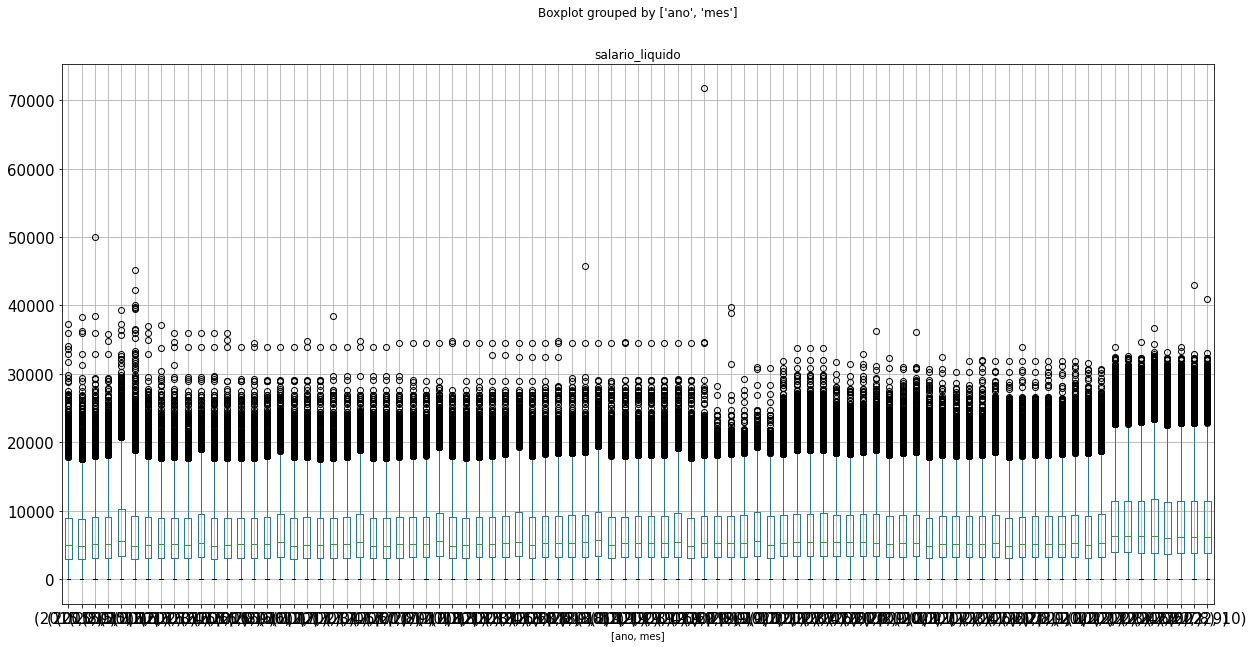

In [26]:
# Distribuicao do salario liquido por base de dados

portais = []
for key, item in portal_da_transparencia.items():
  portais.append(item)

todosPortais = pd.concat(portais)
todosPortais.boxplot('salario_liquido', by = ['ano', 'mes'], fontsize = 15, figsize=(20, 10))

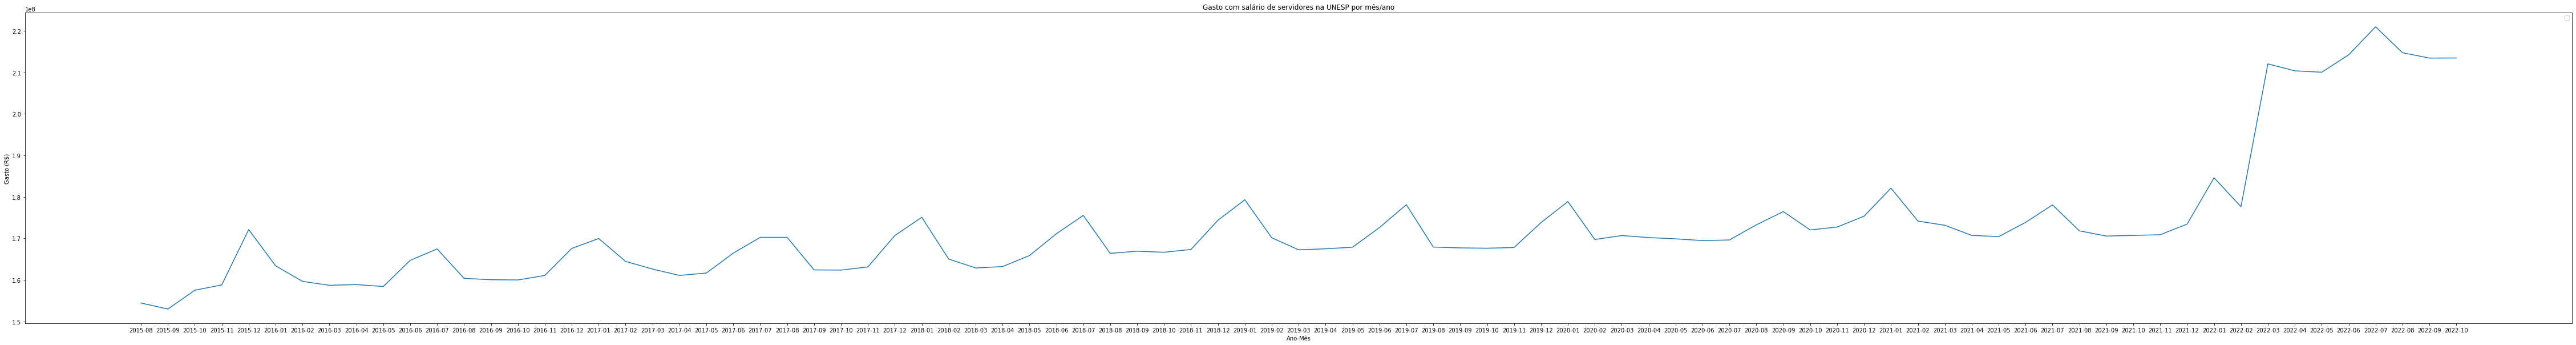

In [27]:
# Valor gasto com salario de servidores por mês/ano

x = []
y = []

for key, item in portal_da_transparencia.items():
  # if "2018" in key or "2019" in key or "2020" in key or "2021" in key or "2022" in key:
    x.append(key)
    y.append(item['vencimentos'].sum())

plt.figure(figsize=(80, 10))
plt.plot(x, y)

plt.title('Gasto com salário de servidores na UNESP por mês/ano')
plt.xlabel('Ano-Mês')
plt.ylabel('Gasto (R$)')
plt.legend()

plt.savefig('gasto_salario_servidores_unesp_mes_ano.png')
plt.show()

# Séries Temporais

In [28]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

## Prophet

In [29]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

### Predição de 2021

In [30]:
X_training = pd.DataFrame()

X_test = pd.DataFrame()
y_test = []

# Criando os dados X e y de treinamento e teste
for key, item in portal_da_transparencia.items():
  data = key + '-01'

  # Valores usados para treinamento
  if "2015" in key or "2016" in key or "2017" in key or "2018" in key or "2019" in key or "2020" in key:
  # if "2019" in key or "2020" in key or "2021" in key:
    soma = item['vencimentos'].sum()
    X_training = X_training.append({'ds': data, 'y': soma}, ignore_index=True)
  
  # Valores usados para teste
  elif "2021" in key:
    soma = item['vencimentos'].sum()
    X_test = X_test.append({'ds': data}, ignore_index=True)
    y_test.append(soma)

In [31]:
# Treinando o modelo
p = Prophet()
p.fit(X_training)

# Predizendo
forecast = p.predict(X_test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp49qo5car/0w3lpqyu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp49qo5car/qzt31hxn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80976', 'data', 'file=/tmp/tmp49qo5car/0w3lpqyu.json', 'init=/tmp/tmp49qo5car/qzt31hxn.json', 'output', 'file=/tmp/tmp49qo5car/prophet_model2ckcy354/prophet_model-20221211145148.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:51:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:51:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
7,2021-08-01,1.738330e+08,1.713742e+08,1.761822e+08
8,2021-09-01,1.727670e+08,1.703317e+08,1.750711e+08
9,2021-10-01,1.718669e+08,1.693119e+08,1.739903e+08
10,2021-11-01,1.725672e+08,1.703388e+08,1.749945e+08
11,2021-12-01,1.789009e+08,1.766114e+08,1.811567e+08


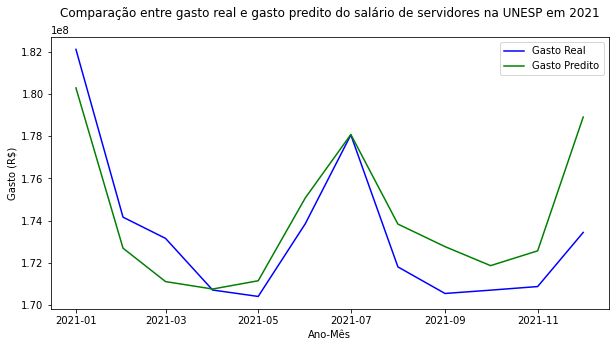

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(pd.to_datetime(X_test['ds'], format='%Y-%m-%d'), y_test, color = 'blue', label='Gasto Real')
plt.plot(pd.to_datetime(X_test['ds'], format='%Y-%m-%d'), forecast['yhat'], color = 'green', label='Gasto Predito')

plt.title('Comparação entre gasto real e gasto predito do salário de servidores na UNESP em 2021', pad=20)
plt.xlabel('Ano-Mês')
plt.ylabel('Gasto (R$)')
plt.legend()

plt.savefig('comparacao_gasto_real_gasto_predito_2021_salario_servidores_unesp.png')
plt.show()

In [ ]:
mae = mean_absolute_error(y_test, forecast['yhat'])
mape = mean_absolute_percentage_error(y_test, forecast['yhat'])
print("mae", mae, "mape", mape)

mae 1660396.8856911238 mape 0.009583833572126024


### Predição de 2022

In [ ]:
X_training = pd.DataFrame()

X_test = pd.DataFrame()
y_test = []

# Criando os dados X e y de treinamento e teste
# As opções são 1) treinar com dados de 2015 até 2021 ou 2) treinar com dados de 2019 até 2021
for key, item in portal_da_transparencia.items():
  data = key + '-01'

  # Valores usados para treinamento
  if "2015" in key or "2016" in key or "2017" in key or "2018" in key or "2019" in key or "2020" in key or "2021" in key:
  # if "2019" in key or "2020" in key or "2021" in key:
    soma = item['vencimentos'].sum()
    X_training = X_training.append({'ds': data, 'y': soma}, ignore_index=True)
  
  # Valores usados para teste
  elif "2022" in key:
    soma = item['vencimentos'].sum()
    X_test = X_test.append({'ds': data}, ignore_index=True)
    y_test.append(soma)

In [ ]:
# Treinando o modelo
p = Prophet()
p.fit(X_training)

# Predizendo
forecast = p.predict(X_test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp49qo5car/4uziv5mz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp49qo5car/xo2xdpa5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29559', 'data', 'file=/tmp/tmp49qo5car/4uziv5mz.json', 'init=/tmp/tmp49qo5car/xo2xdpa5.json', 'output', 'file=/tmp/tmp49qo5car/prophet_modele2jx38t_/prophet_model-20221211141312.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:13:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:13:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
5,2022-06-01,1.755722e+08,1.729729e+08,1.779971e+08
6,2022-07-01,1.801003e+08,1.777055e+08,1.825193e+08
7,2022-08-01,1.721041e+08,1.698229e+08,1.744275e+08
8,2022-09-01,1.708117e+08,1.683943e+08,1.731954e+08
9,2022-10-01,1.715086e+08,1.692200e+08,1.737590e+08


In [ ]:
# Ajustando os valores preditos para que a partir de março sofra reajuste de 20%
y_pred = []
y_pred_upper = []

for key, row in forecast.iterrows():
    if row['ds'] >= pd.Timestamp(2022, 1, 1) and row['ds'] <= pd.Timestamp(2022, 2, 1):
      y_pred.append(row['yhat'])
      y_pred_upper.append(row['yhat_upper'])
    else:
      y_pred.append(row['yhat'] + row['yhat'] * 0.2067)
      y_pred_upper.append(row['yhat_upper'] + row['yhat_upper'] * 0.2067)

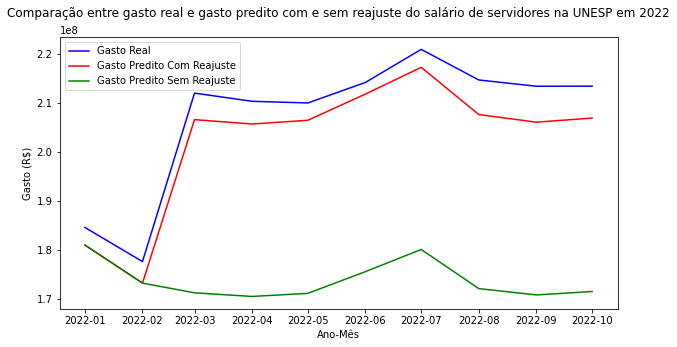

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(pd.to_datetime(X_test['ds'], format='%Y-%m-%d'), y_test, color = 'blue', label='Gasto Real')
plt.plot(pd.to_datetime(X_test['ds'], format='%Y-%m-%d'), y_pred, color = 'red', label='Gasto Predito Com Reajuste')
plt.plot(pd.to_datetime(X_test['ds'], format='%Y-%m-%d'), forecast['yhat'], color = 'green', label='Gasto Predito Sem Reajuste')

plt.title('Comparação entre gasto real e gasto predito com e sem reajuste do salário de servidores na UNESP em 2022', pad=20)
plt.xlabel('Ano-Mês')
plt.ylabel('Gasto (R$)')
plt.legend()

plt.savefig('comparacao_gasto_real_gasto_predito_com_sem_reajuste_2022_salario_servidores_unesp.png')
plt.show()

In [ ]:
mae = mean_absolute_error(y_test, forecast['yhat'])
mape = mean_absolute_percentage_error(y_test, forecast['yhat'])
print("mae", mae, "mape", mape)

mae 33443260.525258005 mape 0.15720536770896548


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("mae", mae, "mape", mape)

mae 4857169.502806386 mape 0.02342575150583469


### Predição Futuro (2023, 2024 e 2025)

In [ ]:
X_training = pd.DataFrame()

# Criando os dados X e y de treinamento utilizando todas as bases (2015 até 2022/10)
for key, item in portal_da_transparencia.items():
  data = key + '-01'
  soma = item['vencimentos'].sum()
  X_training = X_training.append({'ds': data, 'y': soma}, ignore_index=True)

In [ ]:
X_training.tail()

,ds,y
82,2022-06-01,2.142397e+08
83,2022-07-01,2.210002e+08
84,2022-08-01,2.147432e+08
85,2022-09-01,2.134628e+08
86,2022-10-01,2.134797e+08


In [ ]:
X_test = pd.DataFrame()

# Criando as datas que devem ser preditas (2022/11 até 2025/12)
for ano in range (2022, 2026):
  for mes in range(1, 13):
    # O Portal da Transparencia possui dados até 2022/10
    if ano == 2022 and mes < 11:
      continue

    data = str(ano) + '-' + ('0' + str(mes) if mes < 10 else str(mes)) + '-01'
    X_test = X_test.append({'ds': data}, ignore_index=True)

In [ ]:
X_test.head()

,ds
0,2022-11-01
1,2022-12-01
2,2023-01-01
3,2023-02-01
4,2023-03-01


#### Prophet Normal

In [ ]:
# Treinando
# phophet = Prophet(changepoint_prior_scale=0.05, changepoints=['2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01'], daily_seasonality=False, weekly_seasonality=False)
phophet = Prophet(changepoint_prior_scale=15, changepoints=['2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01'], daily_seasonality=False, weekly_seasonality=False)
phophet.fit(X_training)

# Predizendo
forecast = phophet.predict(X_test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpl_1r0c0o/l6vine8r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl_1r0c0o/s5r107oo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66264', 'data', 'file=/tmp/tmpl_1r0c0o/l6vine8r.json', 'init=/tmp/tmpl_1r0c0o/s5r107oo.json', 'output', 'file=/tmp/tmpl_1r0c0o/prophet_modelz4ljarw6/prophet_model-20221207044444.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:44:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:44:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
33,2025-08-01,2.266932e+08,-2.625421e+08,6.850786e+08
34,2025-09-01,2.257117e+08,-2.950830e+08,7.008941e+08
35,2025-10-01,2.250669e+08,-3.230795e+08,7.183567e+08
36,2025-11-01,2.259404e+08,-3.513747e+08,7.370122e+08
37,2025-12-01,2.318944e+08,-3.660702e+08,7.748927e+08


#### Neural Prophet

In [ ]:
pip install neuralprophet
from neuralprophet import NeuralProphet

In [ ]:
# Tentativa 3

# Modelo
model_neural_prophet = NeuralProphet(
    changepoints=['2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01'], 
    yearly_seasonality=True, 
    growth= "logistic"
)

# Feriados
#model_neural_prophet.add_country_holidays(country_name='BR')

# Sazonalidade semestral
model_neural_prophet.add_seasonality(name='monthly', period=6, fourier_order=5)

# Treino
model_neural_prophet.fit(
    X_training,
)

# Dados futuros para predição
future = model_neural_prophet.make_future_dataframe(X_training, periods=38)

# Predição
forecast = model_neural_prophet.predict(future)
forecast[['ds', 'yhat1', 'trend']].head()

ERROR - (NP.config.__post_init__) - Invalid trend growth 'logistic'. Set to 'linear'
ERROR:NP.config:Invalid trend growth 'logistic'. Set to 'linear'
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.805% of the data.
INFO:NP.df_utils:Major frequency MS corresponds to 90.805% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS
INFO:NP.df_utils:Dataframe freq automatically defined as MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProp

  0%|          | 0/106 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.00E-01, min: 2.20E-01
INFO:NP.utils_torch:lr-range-test results: steep: 1.00E-01, min: 2.20E-01


  0%|          | 0/106 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.00E-01, min: 2.20E-01
INFO:NP.utils_torch:lr-range-test results: steep: 1.00E-01, min: 2.20E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.00E-01
INFO:NP.forecaster:lr-range-test selected learning rate: 1.00E-01
Epoch[589/589]: 100%|██████████| 589/589 [00:14<00:00, 40.07it/s, SmoothL1Loss=0.0011, MAE=1.93e+6, RMSE=2.61e+6, Loss=0.000862, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.805% of the data.
INFO:NP.df_utils:Major frequency MS corresponds to 90.805% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO:NP.df_utils:Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 89.4

,ds,yhat1,trend
0,2022-11-01,213217408.0,216953760.0
1,2022-12-01,219073344.0,217270656.0
2,2023-01-01,226684480.0,217598144.0
3,2023-02-01,218680128.0,217925616.0
4,2023-03-01,218283744.0,218221408.0


#### Resultados

##### Antigo

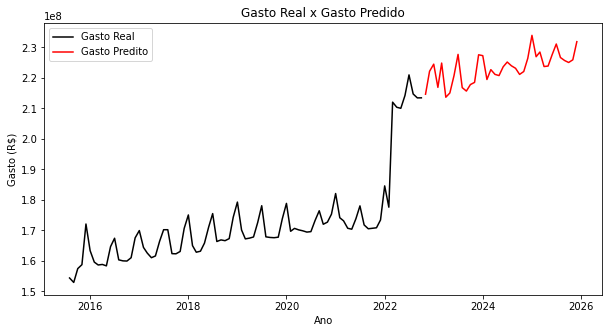

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(pd.to_datetime(X_training['ds'], format='%Y-%m-%d'), X_training['y'], color = 'black', label='Gasto Real')
plt.plot(forecast['ds'], forecast['yhat'], color = 'red', label='Gasto Predito')

plt.title('Gasto Real x Gasto Predido')
plt.xlabel('Ano')
plt.ylabel('Gasto (R$)')
plt.legend()

plt.show()

##### Novo

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
fig = px.line(X_training, 
              x=pd.to_datetime(X_training['ds'], format='%Y-%m-%d'), 
              y=X_training['y'], 
              title='Gasto Salarial UNESP 2015-2022', 
              labels={ "variable": "Variável",  "Mês": "Mês", "value": "Salário (R$)"},
              markers=True)

fig.add_scatter(
    x=forecast['ds'], 
    y=forecast['yhat1'], 
    mode='lines')

fig.show()

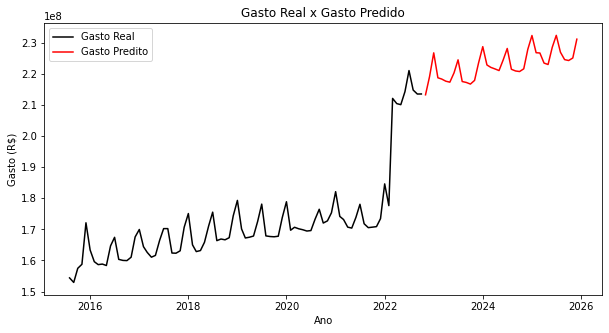

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(pd.to_datetime(X_training['ds'], format='%Y-%m-%d'), X_training['y'], color = 'black', label='Gasto Real')
plt.plot(forecast['ds'], forecast['yhat1'], color = 'red', label='Gasto Predito')

plt.title('Gasto Real x Gasto Predido')
plt.xlabel('Ano')
plt.ylabel('Gasto (R$)')
plt.legend()

plt.show()

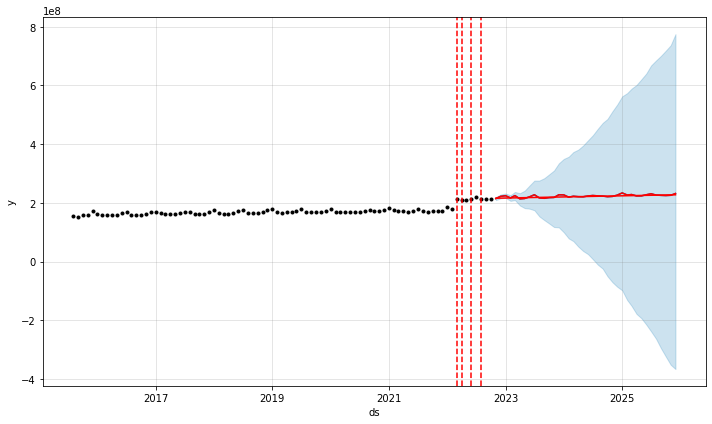

In [ ]:
fig = phophet.plot(forecast)
plt.plot(forecast['ds'], forecast['yhat'], color = 'red', label='Gasto Predito')
a = add_changepoints_to_plot(fig.gca(),phophet,forecast)

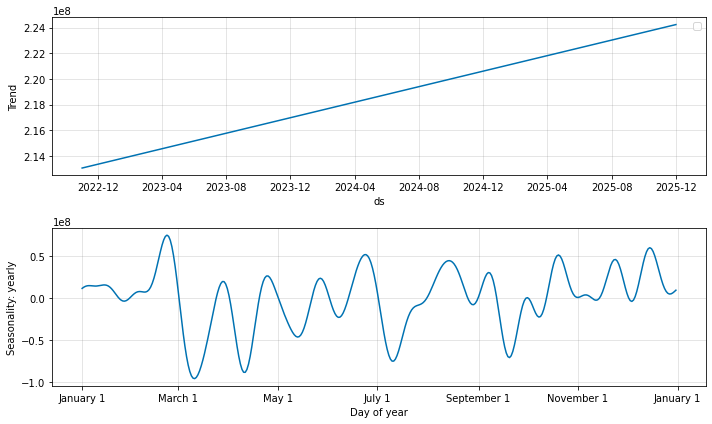

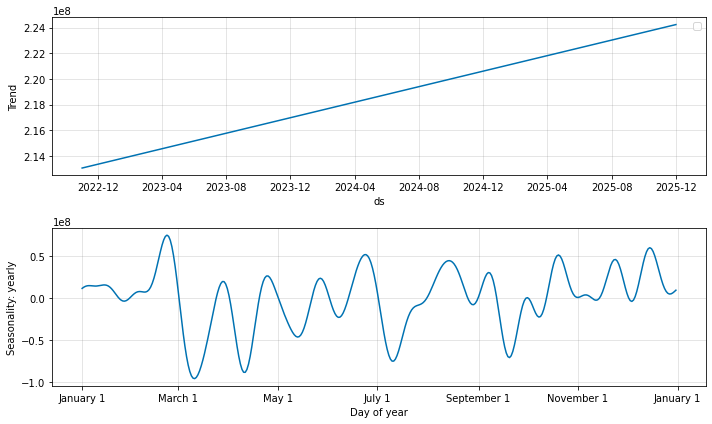

In [ ]:
#phophet.plot_components(forecast)
model_neural_prophet.plot_components(forecast)

https://xang1234.github.io/prophet/

## SARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import itertools

### Predição de 2022

In [ ]:
training_date = []
y_training = []
test_date = []
y_test = []

# Criando os dados X e y de treinamento e teste
# As opções são 1) treinar com dados de 2015 até 2021 ou 2) treinar com dados de 2019 até 2021
for key, item in portal_da_transparencia.items():
  data = key + '-01'

  # Valores usados para treinamento
  if "2015" in key or "2016" in key or "2017" in key or "2018" in key or "2019" in key or "2020" in key or "2021" in key:
  # if "2019" in key or "2020" in key or "2021" in key:
    soma = item['vencimentos'].sum()
    y_training.append(soma)
    training_date.append(pd.to_datetime(key, format='%Y-%m-%d'))
  
  # Valores usados para teste
  elif "2022" in key:
    soma = item['vencimentos'].sum()
    y_test.append(soma)
    test_date.append(pd.to_datetime(key, format='%Y-%m-%d'))

In [ ]:
len(test_date)

10

In [ ]:
len(y_training)

77

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
simple_pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))]

print('Parameter combinations for Seasonal ARIMA...')

for param in simple_pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_training, order=param,)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Parameter combinations for Seasonal ARIMA...
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3137.30311354266
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3137.30311354266
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3137.30311354266
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3137.30311354266
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3137.30311354266
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3137.30311354266
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3137.30311354266
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3137.30311354266
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3085.713875885061
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3085.713875885061
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3085.713875885061
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3085.713875885061
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3085.713875885061
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3085.713875885061
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3085.713875885061
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3085.713875885061
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2549.771807591848
ARIMA(0, 1, 0)x(0, 0, 1, 12)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:2592.4222255523205
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:2592.4222255523205
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:2592.4222255523205
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:2592.4222255523205
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:2592.4222255523205
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:2588.7004363752835
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2588.7004363752835
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:2588.7004363752835
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:2588.7004363752835
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:2588.7004363752835
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2588.7004363752835
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:2588.7004363752835
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:2588.7004363752835
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:2551.5993072091505
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:2551.5993072091505
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:2551.5993072091505
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2551.5993072091505
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:2551.599307

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2552.3759623959345
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:2552.3759623959345
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:2552.3759623959345
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:2552.3759623959345
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2552.3759623959345
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:2552.3759623959345
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:2552.3759623959345


ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2549.771807591848

In [ ]:
sarimax = SARIMAX(y_training, order=(0, 1, 0), seasonal_order=(0, 0, 0, 12)).fit()
print(sarimax.summary())

forecast = sarimax.get_forecast(steps = 10)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   77
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1273.886
Date:                Fri, 02 Dec 2022   AIC                           2549.772
Time:                        14:52:01   BIC                           2552.103
Sample:                             0   HQIC                          2550.703
                                 - 77                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.093e+13   3.14e+12      6.658      0.000    1.48e+13    2.71e+13
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 1.98
Prob(Q):                              0.65   Pr

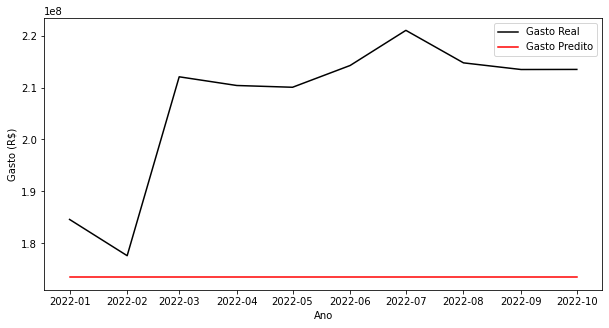

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(test_date, y_test, color = 'black', label='Gasto Real')
plt.plot(test_date, forecast.predicted_mean, color = 'red', label='Gasto Predito')

plt.xlabel('Ano')
plt.ylabel('Gasto (R$)')
plt.legend()

plt.show()